In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

In [7]:
path_students = r"C:\Users\nic-e\OneDrive\Dokumente\GitHub\DHBW_Daten_Analyse\Data\StudentsPerformance.csv"
df = pd.read_csv(path_students)
df.head()
categorical_variables = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Umwandlung von Objektbeschriftungen in kategorische


In [8]:
df[categorical_variables] = df[categorical_variables].astype('category')
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

## Umwandlung von Kategoriebezeichnungen in numerische Werte mit LabelEncoder


In [11]:
def categorical_encoder(data, category_variables):
    label = LabelEncoder()
    for category in category_variables:
        label.fit(data[category].drop_duplicates())
        data[category] = label.transform(data[category])
    return df

In [12]:
df = categorical_encoder(data=df, category_variables=categorical_variables)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


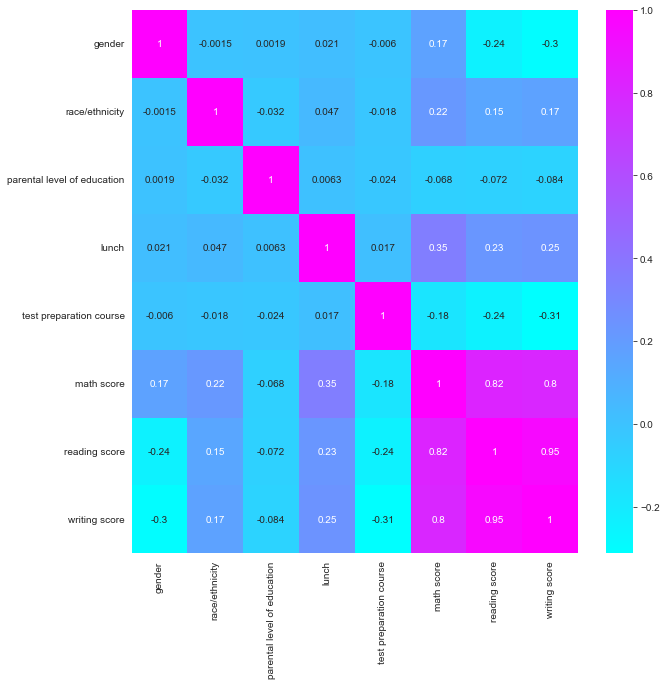

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

### Keine besondere Korrelation erkennbar außer mit Reading und Writing Score

# Linear Regression

-13.172003213356845
[12.87095046  0.93043541  0.16345256  3.41137978  3.24624043  0.34895441
  0.61938931]
0.8617897267279011
Feature: 0, Score: 12.87095
Feature: 1, Score: 0.93044
Feature: 2, Score: 0.16345
Feature: 3, Score: 3.41138
Feature: 4, Score: 3.24624
Feature: 5, Score: 0.34895
Feature: 6, Score: 0.61939


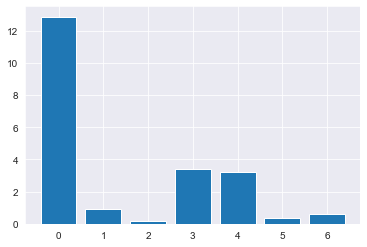

In [16]:
x = df.drop(['math score'], axis = 1)
y = df['math score']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

# get importance
importance = Lin_reg.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Predicting the Math Scores

In [18]:
y_test_pred = Lin_reg.predict(x_test)

## Comparing the actual output values with the predicted values

,Actual,Predicted
993,62,63.988522
859,87,74.875760
298,40,48.908091
553,77,67.666393
672,69,70.292329


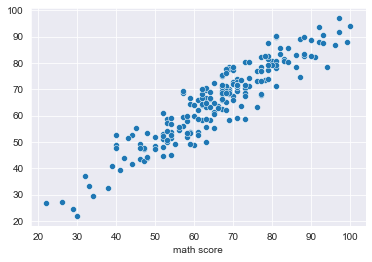

In [19]:
sns.scatterplot(y_test,y_test_pred)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head()

In [22]:
mse = mean_squared_error(y_test, y_test_pred)
mrse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"The Mean Squared Error is:          {mse}")
print(f"The Mean Root Squared Error is:     {mrse}")
print(f"The Mean Absolute Error is:         {mae}")

The Mean Squared Error is:          31.318669059894834
The Mean Root Squared Error is:     5.596308520792508
The Mean Absolute Error is:         4.402780807752258


### Der Mittlere Absolute Fehler ist 4.40, während der Mittlere Quadratische Fehler 31.31 ist.
### Dadurch dass MAE und MRSE sehr nah bei einander liegen hat das Lineare Modell eine relativ geringe Varianz bezogen auf den fehler